In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

from environment import McCallModel, HuggettModel
from agent import McCallAgent, HuggettAgent
from optimizer import (QLearning, DynaQ, DynaQACO, 
                       dump_opt, load_opt)
from model import (VanillaDyna, TimeDyna,
                   NonDetermVanillaDyna, NonDetermTimeDyna,
                   DynaACO)

In [2]:
mcm = McCallModel(60, c=25)
mcm_agent = McCallAgent(np.inf, gamma=0.9)

hug = HuggettModel(20, 5, r=0.01)
hug_agent = HuggettAgent(gamma=0.5, crra_gamma=1.5)

q_learn_params = {
    "alpha": 0.1, 
    "eps": 0.3,
}

mcm_q_learning = QLearning(mcm, mcm_agent, **q_learn_params)
hug_q_learning = QLearning(hug, hug_agent, **q_learn_params)

dyna_params = {
    "alpha": 0.1, 
    "eps": 0.1,
    "planning_steps": 50
}

mcm_vanilla_dyna = NonDetermVanillaDyna(mcm)
mcm_dyna_q = DynaQ(mcm, mcm_agent, mcm_vanilla_dyna, **dyna_params)

hug_vanilla_dyna = NonDetermVanillaDyna(hug)
hug_dyna_q = DynaQ(hug, hug_agent, hug_vanilla_dyna, **dyna_params)

mcm_time_dyna = NonDetermTimeDyna(mcm, time_weight=1e-4)
mcm_time_dyna_q = DynaQ(mcm, mcm_agent, mcm_time_dyna, **dyna_params)

hug_time_dyna = NonDetermTimeDyna(hug, time_weight=1e-4)
hug_time_dyna_q = DynaQ(hug, hug_agent, hug_time_dyna, **dyna_params)

N_ANTS = 50

mcm_aco_dyna = DynaACO(mcm, time_weight=1e-4)
mcm_aco_dyna_q = DynaQACO(mcm, mcm_agent, mcm_aco_dyna, N_ANTS, **dyna_params)

hug_aco_dyna = DynaACO(hug, time_weight=1e-4)
hug_aco_dyna_q = DynaQACO(hug, hug_agent, hug_aco_dyna, N_ANTS, **dyna_params)

In [3]:
fit_params = {
    "iters": int(1e5),
    "run_len": 50,
    "verbose": True
}

aco_fit_params = fit_params.copy()
aco_fit_params["iters"] //= N_ANTS

SAVE_RESULTS = True
RESULTS_PATH = "results/big_run/"

def _glob_savefig(title):
    if SAVE_RESULTS:
        file_name = re.sub("([A-Z]{1}: | \|| \[| \])", '', title).replace(' ', '_')
        plt.savefig(RESULTS_PATH+file_name+'.png')

def plot_fit_log(opt, f=lambda a: a):
    arr = f(np.array(opt.fit_log))
    plt.plot(arr)
    title = "Fitting Rewards from " + str(opt)
    plt.title(title)
    _glob_savefig(title)
    
    
def plot_argmax(opt):
    y = np.argmax(opt.q_value, axis=1)
    x = np.arange(len(y))
    plt.plot(x, y)
    title = "Argmax Q from " + str(opt)
    plt.title(title)
    _glob_savefig(title)

In [4]:
mcm_q_learning.fit(**fit_params)

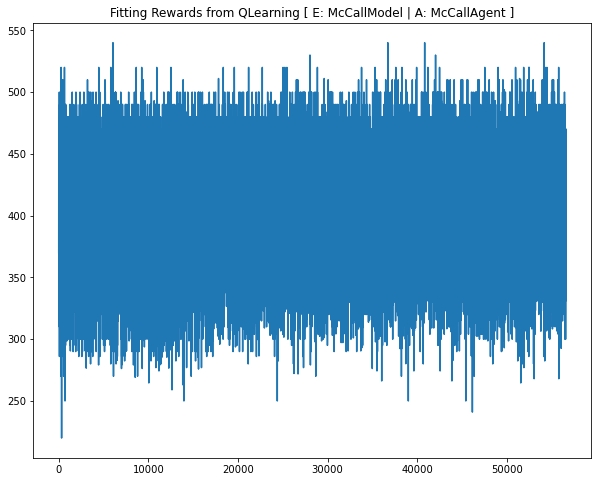

In [5]:
plot_fit_log(mcm_q_learning)

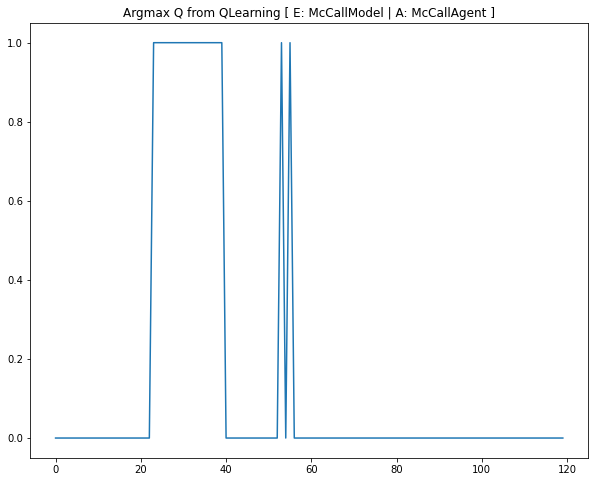

In [6]:
plot_argmax(mcm_q_learning)

In [7]:
mcm_dyna_q.fit(**fit_params)

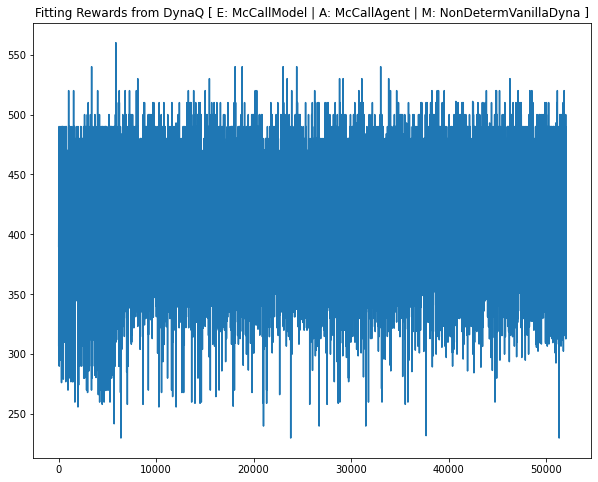

In [8]:
plot_fit_log(mcm_dyna_q)

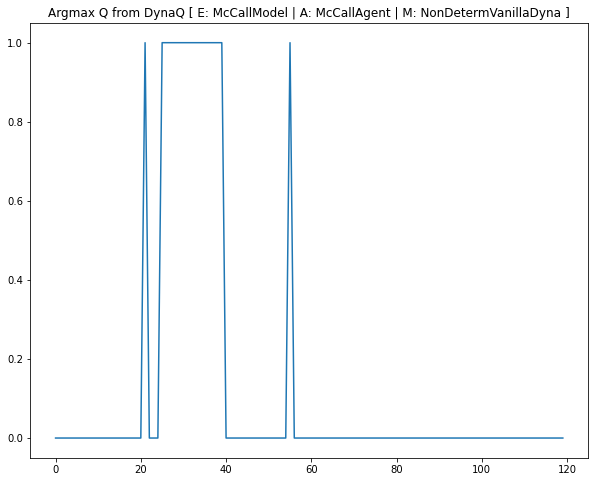

In [9]:
plot_argmax(mcm_dyna_q)

In [10]:
mcm_time_dyna_q.fit(**fit_params)

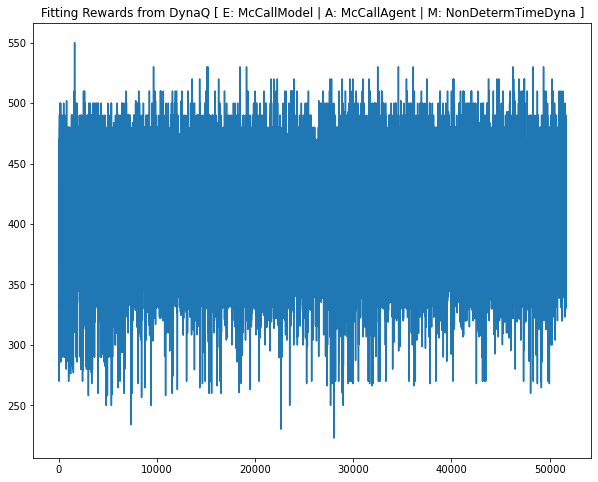

In [11]:
plot_fit_log(mcm_time_dyna_q) 

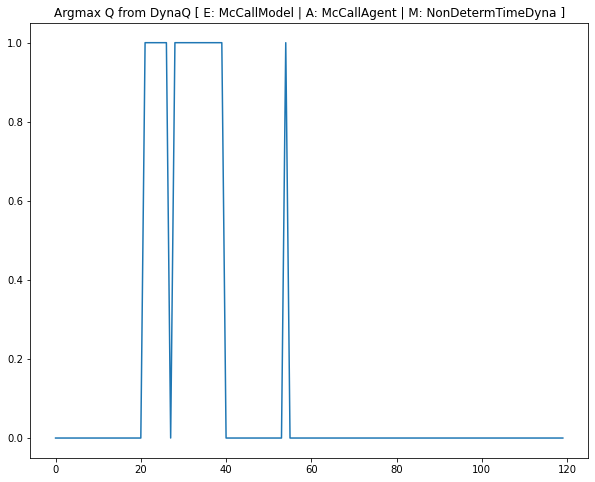

In [12]:
plot_argmax(mcm_time_dyna_q)

In [13]:
mcm_aco_dyna_q.fit(**aco_fit_params)

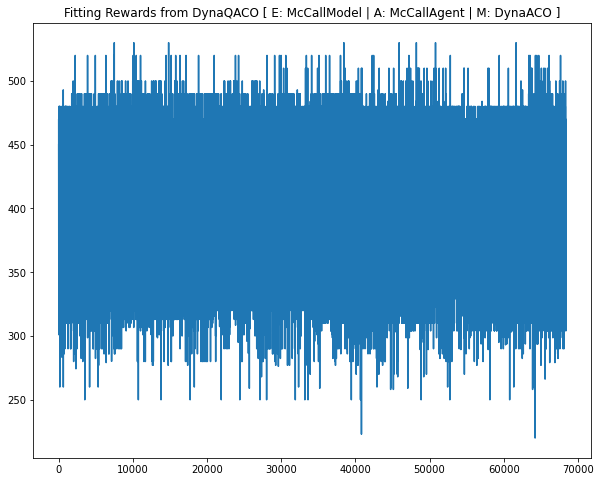

In [14]:
plot_fit_log(mcm_aco_dyna_q) 

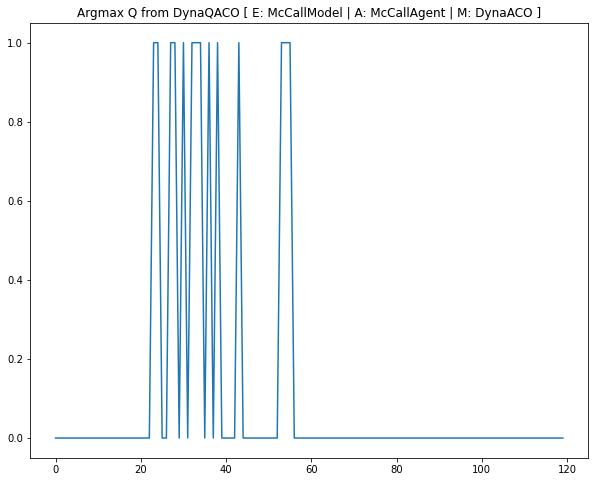

In [15]:
plot_argmax(mcm_aco_dyna_q)

In [16]:
hug_q_learning.fit(**fit_params)

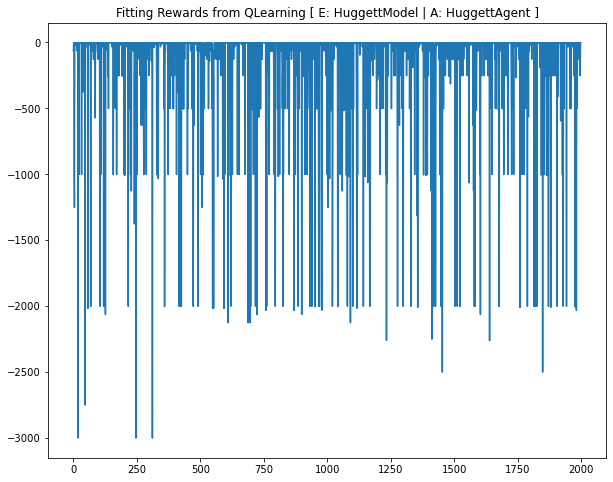

In [17]:
plot_fit_log(hug_q_learning) 

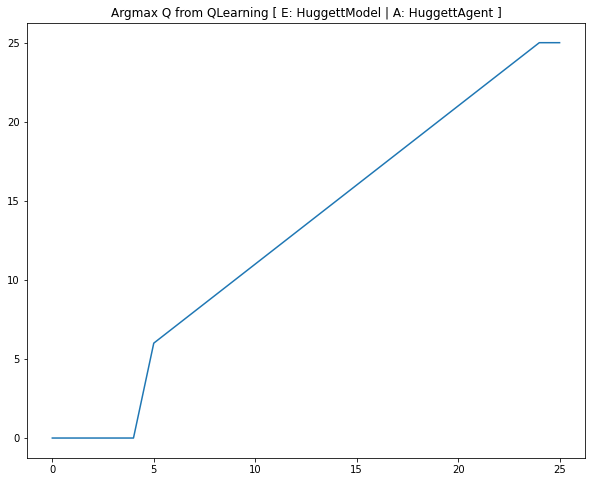

In [18]:
plot_argmax(hug_q_learning)

In [19]:
hug_dyna_q.fit(**fit_params)

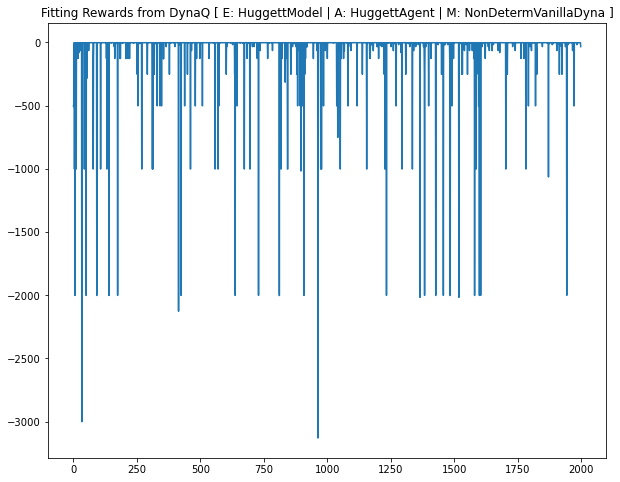

In [20]:
plot_fit_log(hug_dyna_q)

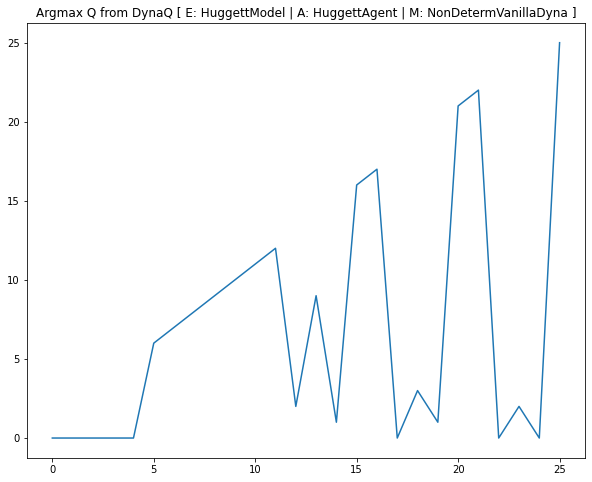

In [21]:
plot_argmax(hug_dyna_q)

In [22]:
hug_time_dyna_q.fit(**fit_params)

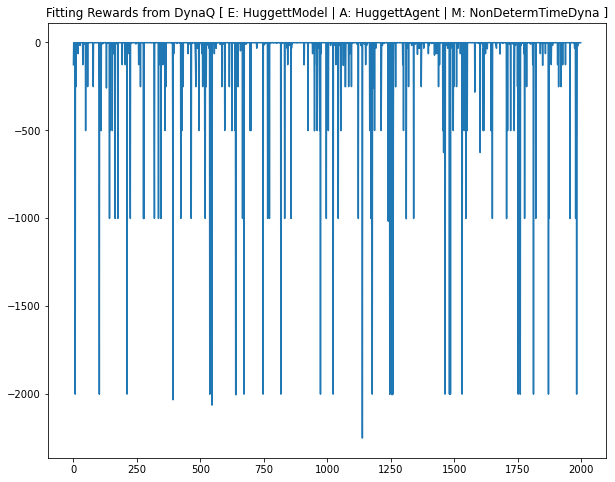

In [23]:
plot_fit_log(hug_time_dyna_q) 

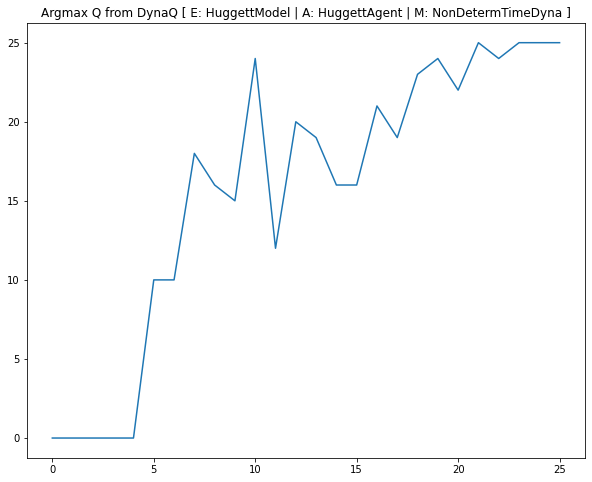

In [24]:
plot_argmax(hug_time_dyna_q)

In [25]:
hug_aco_dyna_q.fit(**aco_fit_params)

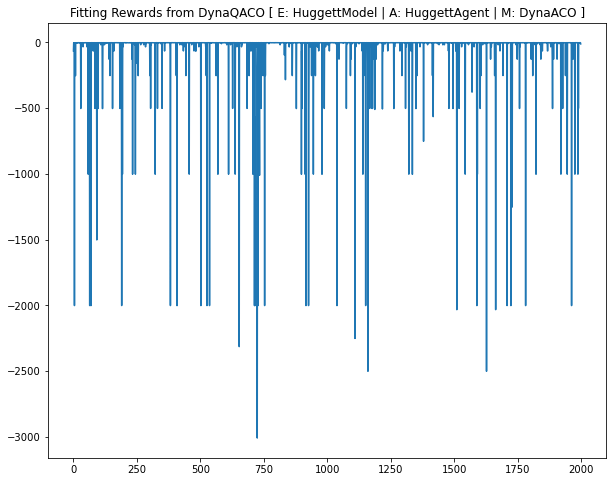

In [26]:
plot_fit_log(hug_aco_dyna_q) 

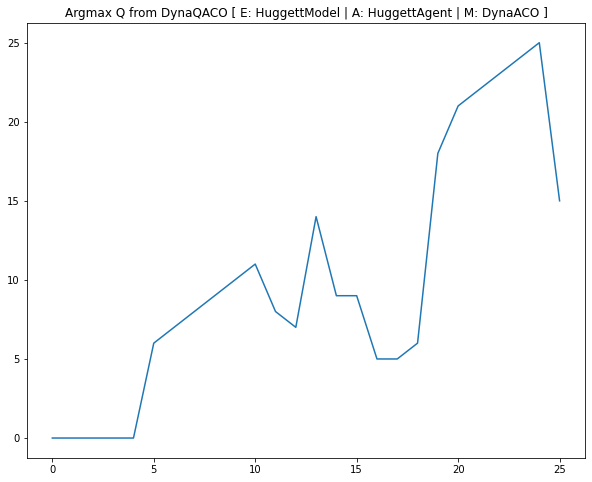

In [27]:
plot_argmax(hug_aco_dyna_q)

In [28]:
test_params = {
    "iters": 100,
    "n_eps": 100
}

res = {
    "Optimizer": [], 
    "Environment": [], 
    "Mean Rewards": [], 
    "Fitting Time": []
}

res["Optimizer"].append("Q-Learning")
res["Environment"].append("McCall")
res["Mean Rewards"].append(mcm_q_learning.test(**test_params).mean())
res["Fitting Time"].append(mcm_q_learning.fit_time)

res["Optimizer"].append("DynaQ")
res["Environment"].append("McCall")
res["Mean Rewards"].append(mcm_dyna_q.test(**test_params).mean())
res["Fitting Time"].append(mcm_dyna_q.fit_time)

res["Optimizer"].append("DynaQ+")
res["Environment"].append("McCall")
res["Mean Rewards"].append(mcm_time_dyna_q.test(**test_params).mean())
res["Fitting Time"].append(mcm_time_dyna_q.fit_time)

res["Optimizer"].append("ACO DynaQ+")
res["Environment"].append("McCall")
res["Mean Rewards"].append(mcm_aco_dyna_q.test(**test_params).mean())
res["Fitting Time"].append(mcm_aco_dyna_q.fit_time)

res["Optimizer"].append("Q-Learning")
res["Environment"].append("Huggett")
res["Mean Rewards"].append(hug_q_learning.test(**test_params).mean())
res["Fitting Time"].append(hug_q_learning.fit_time)

res["Optimizer"].append("DynaQ")
res["Environment"].append("Huggett")
res["Mean Rewards"].append(hug_dyna_q.test(**test_params).mean())
res["Fitting Time"].append(hug_dyna_q.fit_time)

res["Optimizer"].append("DynaQ+")
res["Environment"].append("Huggett")
res["Mean Rewards"].append(hug_time_dyna_q.test(**test_params).mean())
res["Fitting Time"].append(hug_time_dyna_q.fit_time)

res["Optimizer"].append("ACO DynaQ+")
res["Environment"].append("Huggett")
res["Mean Rewards"].append(hug_aco_dyna_q.test(**test_params).mean())
res["Fitting Time"].append(hug_aco_dyna_q.fit_time)

df = pd.DataFrame.from_dict(res)
df

,Optimizer,Environment,Mean Rewards,Fitting Time
0,Q-Learning,McCall,410.865750,81.025059
1,DynaQ,McCall,417.330448,470.455797
2,DynaQ+,McCall,422.447582,494.747565
3,ACO DynaQ+,McCall,405.878000,90.506384
4,Q-Learning,Huggett,-1.698124,84.621856
5,DynaQ,Huggett,-1.695528,480.070568
6,DynaQ+,Huggett,-1.695875,506.255441
7,ACO DynaQ+,Huggett,-1.756124,92.554653


In [33]:
df1 = df.pivot(index="Optimizer", columns="Environment").loc[["Q-Learning", "DynaQ", "DynaQ+", "ACO DynaQ+"]]
df1

Mean Rewards             Fitting Time            
Environment      Huggett      McCall      Huggett      McCall
Optimizer                                                    
Q-Learning     -1.698124  410.865750    84.621856   81.025059
DynaQ          -1.695528  417.330448   480.070568  470.455797
DynaQ+         -1.695875  422.447582   506.255441  494.747565
ACO DynaQ+     -1.756124  405.878000    92.554653   90.506384

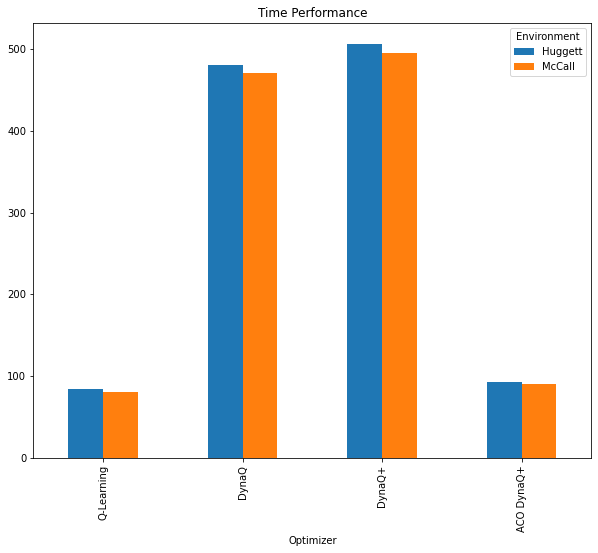

In [30]:
df1["Fitting Time"].plot.bar()
plt.title("Time Performance")
_glob_savefig("Time Performance")

array([<AxesSubplot:title={'center':'Huggett'}, xlabel='Optimizer'>,
       <AxesSubplot:title={'center':'McCall'}, xlabel='Optimizer'>],
      dtype=object)

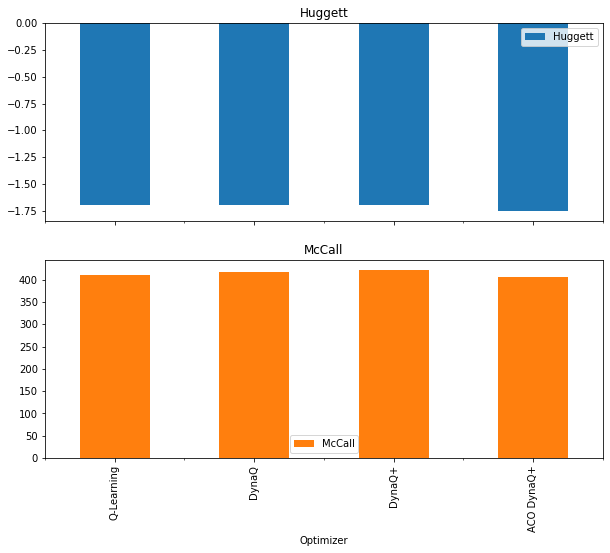

In [31]:
df1["Mean Rewards"].plot.bar(subplots=True)

In [35]:
print(df1.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} & \multicolumn{2}{l}{Mean Rewards} & \multicolumn{2}{l}{Fitting Time} \\
Environment &      Huggett &      McCall &      Huggett &      McCall \\
Optimizer  &              &             &              &             \\
\midrule
Q-Learning &    -1.698124 &  410.865750 &    84.621856 &   81.025059 \\
DynaQ      &    -1.695528 &  417.330448 &   480.070568 &  470.455797 \\
DynaQ+     &    -1.695875 &  422.447582 &   506.255441 &  494.747565 \\
ACO DynaQ+ &    -1.756124 &  405.878000 &    92.554653 &   90.506384 \\
\bottomrule
\end{tabular}

